# ANN for make simulation and make prediction in physics

# import working liberary

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import RMSprop
from keras.models import load_model
import numpy as np

# global variables

In [26]:
# input variable to program
import os
# Get the name of the Excel file
excel_files = [f for f in os.listdir('.') if f.endswith('.xlsx')]
inputFile = excel_files[0]   # 'All data mesons+baryons.xlsx'
inputSheetName = 'Sheet1'
print("input file : ",inputFile)


input file :  negative particles.xlsx


# read data

In [27]:
# Read the data from the excel file
data_all = pd.read_excel(inputFile,sheet_name=inputSheetName)
temp_data_all = data_all[data_all['spectrum']<60]
data =temp_data_all.reset_index(drop=True)

# Split the data into input and output variables
X = data[['mass','s','N part','Pt']]
y = data['spectrum'].to_frame('spectrum')

print(X.head)
print(y.head)

<bound method NDFrame.head of         mass     s  N part     Pt
0     139.57   7.7     337  0.425
1     139.57   7.7     337  0.475
2     139.57   7.7     337  0.525
3     139.57   7.7     337  0.575
4     139.57   7.7     337  0.625
...      ...   ...     ...    ...
3094  938.27  39.0      14  1.550
3095  938.27  39.0      14  1.650
3096  938.27  39.0      14  1.750
3097  938.27  39.0      14  1.850
3098  938.27  39.0      14  1.950

[3099 rows x 4 columns]>
<bound method NDFrame.head of       spectrum
0      46.3708
1      34.7823
2      26.3221
3      19.7093
4      15.0548
...        ...
3094    0.0027
3095    0.0018
3096    0.0012
3097    0.0008
3098    0.0005

[3099 rows x 1 columns]>


# normaliz input

In [28]:
# Normalize the input
from sklearn.preprocessing import RobustScaler
# Create a RobustScaler object
scaler = RobustScaler()
# Fit the scaler to the input data and transform it
X_normalized = scaler.fit_transform(X)
# Print the normalized input data
print('X_normalized')
print(X_normalized)
X_train = X_normalized
#X_train = X
print('X_train')
print(X_train) 


X_normalized
[[-0.4433542  -0.76774194  1.22702703 -0.46428571]
 [-0.4433542  -0.76774194  1.22702703 -0.39285714]
 [-0.4433542  -0.76774194  1.22702703 -0.32142857]
 ...
 [ 0.5566458   1.2516129  -0.51891892  1.42857143]
 [ 0.5566458   1.2516129  -0.51891892  1.57142857]
 [ 0.5566458   1.2516129  -0.51891892  1.71428571]]
X_train
[[-0.4433542  -0.76774194  1.22702703 -0.46428571]
 [-0.4433542  -0.76774194  1.22702703 -0.39285714]
 [-0.4433542  -0.76774194  1.22702703 -0.32142857]
 ...
 [ 0.5566458   1.2516129  -0.51891892  1.42857143]
 [ 0.5566458   1.2516129  -0.51891892  1.57142857]
 [ 0.5566458   1.2516129  -0.51891892  1.71428571]]


# loada saved model

In [29]:
# Load the saved model
modelName =str.replace(str.split(inputFile,'.')[0],' ','_')  + '.h5'
myepochs = int(100) 
mybatchSize = int(16)
#model = load_model(modelName)
#configure output parameters
outputFile = 'out_- '+modelName+' .xlsx'
summaryOutFile = modelName + ' - Summary .txt'
outputSheetName = 'predicat_ '+modelName+' '
nameFigImg = 'fig_in4_ '+modelName+' .png'

# define the model - compile - fit - save

In [30]:

''' Define the model '''
# Define the model
model = Sequential(name=modelName)
# Add the first dense layer
model.add(Dense(40, input_dim=4, activation='relu'))

# Add batch normalization
#model.add(BatchNormalization())
model.add(Dense(40, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(80, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))

# Add the output layer
model.add(Dense(1))

''' # compile the model      '''
# Compile the model with Levenberg-Marquardt optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.001,)
model.compile(loss='mean_squared_error', optimizer=optimizer)

''' train the model & save current compiled model  '''
# Train the model
#model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)
model.fit(X_train, y, epochs=myepochs, batch_size=mybatchSize) 
# Save the model
model.save(modelName)




Epoch 1/100
194/194 [==============================] - 1s 2ms/step - loss: 35.6002
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 10.5218
Epoch 3/100
194/194 [==============================] - 0s 2ms/step - loss: 7.6684
Epoch 4/100
194/194 [==============================] - 0s 2ms/step - loss: 5.5936
Epoch 5/100
194/194 [==============================] - 0s 2ms/step - loss: 4.8074
Epoch 6/100
194/194 [==============================] - 0s 2ms/step - loss: 4.8189
Epoch 7/100
194/194 [==============================] - 0s 2ms/step - loss: 3.8602
Epoch 8/100
194/194 [==============================] - 0s 2ms/step - loss: 2.9861
Epoch 9/100
194/194 [==============================] - 0s 2ms/step - loss: 3.4512
Epoch 10/100
194/194 [==============================] - 0s 2ms/step - loss: 3.3111
Epoch 11/100
194/194 [==============================] - 0s 2ms/step - loss: 3.2201
Epoch 12/100
194/194 [==============================] - 0s 2ms/step - loss: 3.5479
Epoch 13/10

d:\Repos\ReposEda\DrSamahPrjs\ANN\ANN\.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluate the model and make prediction 

In [31]:
from sklearn.metrics import mean_squared_error

# Make predictions on new data
X_test =pd.DataFrame(X_train) #scaler.transform(X)
#X_test = scaler.fit_transform(X)
print("new_data is : ")
print(X_test)
predictions = model.predict(X_test)
predictions = predictions.flatten()
predictions = pd.Series(predictions)
predictions = predictions.to_frame('predictions')
print("predictions is : ")
print(predictions)

# Evaluate the model
score = model.evaluate(X_test, y)
print("score " , score)
print(score)
mse = mean_squared_error(y,predictions)
print('mse' , mse)


new_data is : 
             0         1         2         3
0    -0.443354 -0.767742  1.227027 -0.464286
1    -0.443354 -0.767742  1.227027 -0.392857
2    -0.443354 -0.767742  1.227027 -0.321429
3    -0.443354 -0.767742  1.227027 -0.250000
4    -0.443354 -0.767742  1.227027 -0.178571
...        ...       ...       ...       ...
3094  0.556646  1.251613 -0.518919  1.142857
3095  0.556646  1.251613 -0.518919  1.285714
3096  0.556646  1.251613 -0.518919  1.428571
3097  0.556646  1.251613 -0.518919  1.571429
3098  0.556646  1.251613 -0.518919  1.714286

[3099 rows x 4 columns]
97/97 [==============================] - 0s 1ms/step
predictions is : 
      predictions
0       47.511372
1       38.375893
2       29.066980
3       20.432264
4       15.456397
...           ...
3094     0.308127
3095     0.330958
3096     0.300396
3097     0.271976
3098     0.246367

[3099 rows x 1 columns]
97/97 [==============================] - 0s 1ms/step - loss: 4.6534
score  4.653426647186279
4.6534266471862

# draw 

shape of datap (3099, 8)
data : 
         mass     s  N part     Pt  spectrum     err1     err2
0     139.57   7.7     337  0.425   46.3708  0.11247  3.01883
1     139.57   7.7     337  0.475   34.7823  0.09267  2.24990
2     139.57   7.7     337  0.525   26.3221  0.07704  1.69598
3     139.57   7.7     337  0.575   19.7093  0.06396  1.26704
4     139.57   7.7     337  0.625   15.0548  0.05379  0.96702
...      ...   ...     ...    ...       ...      ...      ...
3094  938.27  39.0      14  1.550    0.0027  0.00005  0.00026
3095  938.27  39.0      14  1.650    0.0018  0.00004  0.00021
3096  938.27  39.0      14  1.750    0.0012  0.00003  0.00013
3097  938.27  39.0      14  1.850    0.0008  0.00002  0.00009
3098  938.27  39.0      14  1.950    0.0005  0.00002  0.00006

[3099 rows x 7 columns]
pred 
        predictions
0       47.511372
1       38.375893
2       29.066980
3       20.432264
4       15.456397
...           ...
3094     0.308127
3095     0.330958
3096     0.300396
3097     

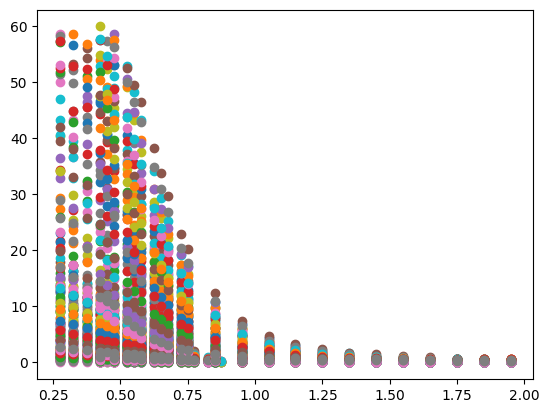

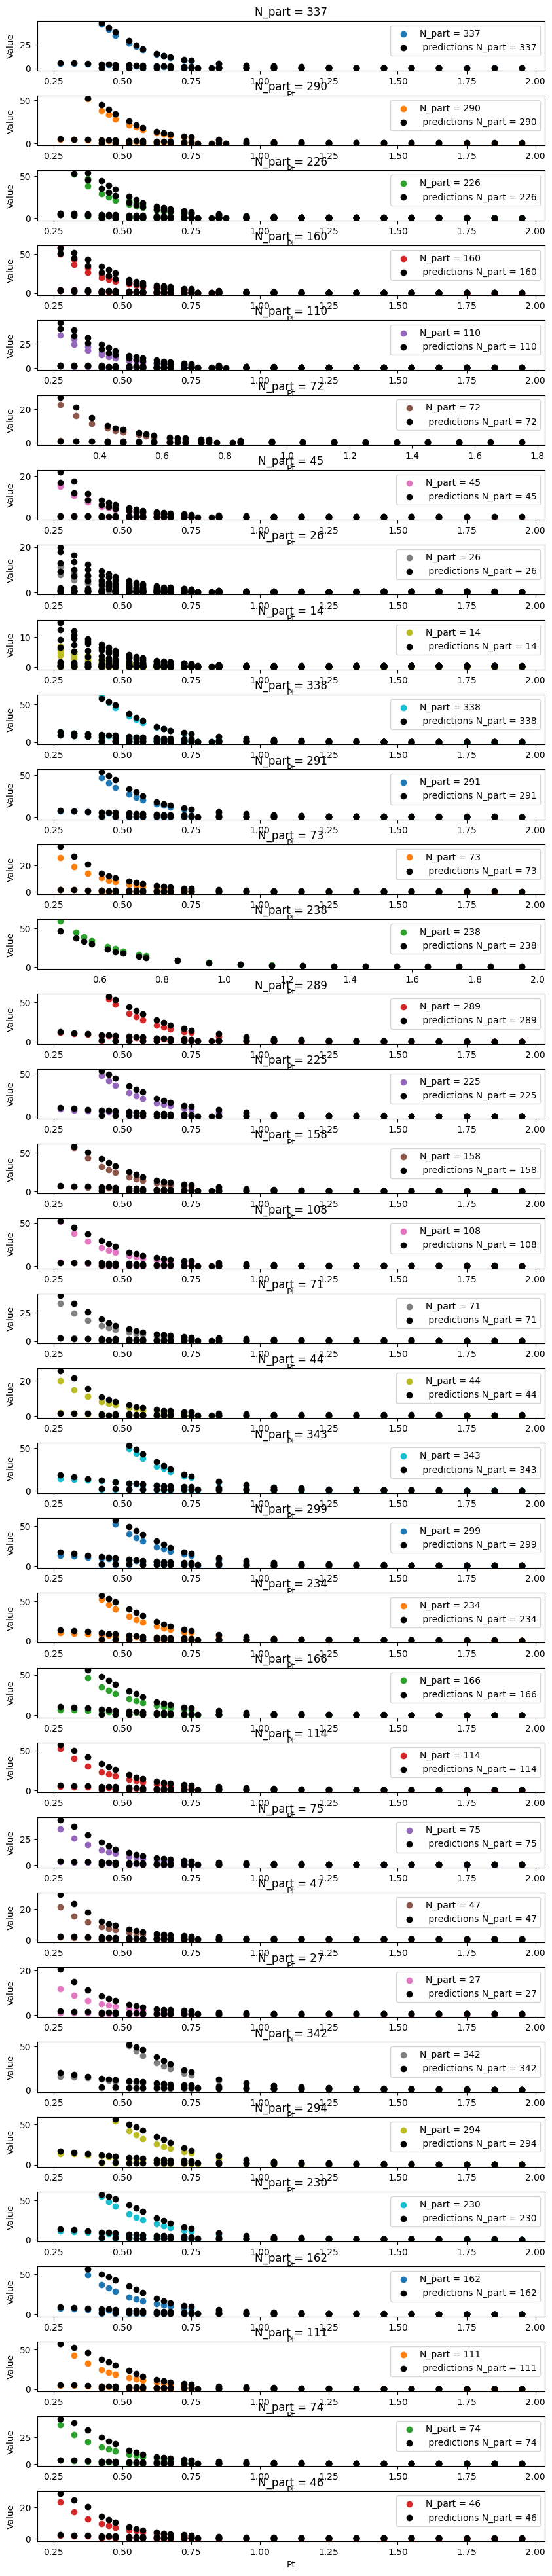

In [33]:
# for drawing in 2d i choose Pt as x-axis
error = data['spectrum'] - predictions['predictions']
error = error.to_frame('error')
#print('shape of data' , data.shape)
#print('shape of pred' , predictions.shape)
#datap = pd.concat([data,predictions],axis=1)
datap = pd.merge(data,predictions,left_index=True, right_index=True)
print('shape of datap',datap.shape)

print('data : \n',data)
print('pred \n ',predictions)
print('datap \n',datap)

# xap : data
xap = pd.DataFrame(datap)
# xapf : xap after filteration
xapf= pd.DataFrame(datap)
xapf = xapf[xapf['mass']==0139.57]
xapf = xapf[xapf['s']==7.7]
#xapf = xapf[xapf['N part']==337]

N_Part_Values  =  xapf['N part'].unique()
print('Npart values : \n')
for n in N_Part_Values:
    print('N is : ',n)
print('Npart values : \n',N_Part_Values)
dataGraph1 = pd.merge(xapf['Pt'],xapf['predictions'],left_index=True, right_index=True)
print('datagraph1 : \n',dataGraph1)
dataGraph = pd.merge(dataGraph1,xapf['spectrum'],left_index=True, right_index=True)
print('dataGraph : \n', dataGraph)
print('shape of dataGraph',dataGraph.shape)
# Plot the data and predictions
mergedData = pd.merge(dataGraph,xapf['N part'],left_index=True, right_index=True)
print('merged data is : \n',mergedData)
#plt.semilogy(xapf['Pt'], xapf['spectrum']   ,'bo', label='Actual')
#plt.semilogy(xapf['Pt'], xapf['predictions'],'ro', label='Predicted')
for n in N_Part_Values:
    plt.scatter(mergedData['Pt'][mergedData['N part']==n],mergedData['spectrum'][mergedData['N part']==n])
    plt.scatter(mergedData['Pt'][mergedData['N part']==n],mergedData['predictions'][mergedData['N part']==n])
    
    #print('n test :\n',mergedData['Pt'][mergedData['N part']==n])
plt.savefig("fig-all-"+nameFigImg)
##########
#import matplotlib.pyplot as plt
# Define the list ofValues and plot the data for each iteration
# Create a figure with two subplots
fig, axs = plt.subplots(nrows=len(N_Part_Values), ncols=1, figsize=(10, 50))

#fig, axs = plt.subplots(N_Part_Values.size,1)
for i, n in enumerate(N_Part_Values):
    # Plot the 'Pt' column where N_part == n
    axs[i].scatter(mergedData['Pt'][mergedData['N part'] == n], 
                 mergedData['spectrum'][mergedData['N part'] == n], 
                 color='C{}'.format(i), 
                 label='N_part = {}'.format(n))

    # Plot the 'predictions' column where N_part == n
    axs[i].scatter(mergedData['Pt'][mergedData['N part'] == n], 
                 mergedData['predictions'][mergedData['N part'] == n], 
                 color='black', 
                  label=' predictions N_part = {}'.format(n))
                 #label='_nolegend_')

    # Add a legend and axis labels to the subplot
    axs[i].legend()
    axs[i].set_xlabel('Pt')
    axs[i].set_ylabel('Value')
    axs[i].set_title('N_part = {}'.format(n))

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.savefig(nameFigImg)
plt.show()


# write output to excel 

In [ ]:
# Write predictions , data to Excel file
err1=data['err1'].to_frame('err1')
err2=data['err2'].to_frame('err2')
#SquareErrorForEachPoint = np.sqrt( ((datap['predictions']- datap['Spectrum'])/(err1- err2)))
SquareErrorForEachPoint =np.square( (datap['predictions']- datap['spectrum'])/(err1['err1']+ err2['err2']))

SquareErrorForEachPoint = pd.Series(SquareErrorForEachPoint)
SquareErrorForEachPoint = SquareErrorForEachPoint.to_frame('SquareErrorForEachPoint')
print('Square error for each point : ',SquareErrorForEachPoint)

outputpredicat = pd.concat([datap, SquareErrorForEachPoint], axis=1)
mysum =outputpredicat['SquareErrorForEachPoint'].sum()
mycount =(outputpredicat['SquareErrorForEachPoint'].count()) -1
rmse = np.sqrt(mysum/mycount)

#rmse = np.sqrt (np.average(outputpredicat['SquareErrorForEachPoint']))
rmse = pd.Series(rmse)
#rmse = pd.DataFrame({'rmse': rmse})
print('RMSE',rmse)

# output is data frame
#print(outputpredicat.head(10))
# Write the DataFrames to an Excel file with three sheets
with pd.ExcelWriter(outputFile) as writer:
    outputpredicat.to_excel(writer, sheet_name=outputSheetName, index=False)
    rmse.to_excel(writer, sheet_name='RMSE', index=False)


# print model summery 

In [ ]:

print("End")
#print("accuracy :" + str(accuracy))
print("score " + str(score))
SummaryOut = model.summary()
print(SummaryOut)

from io import StringIO
# summarize the model
with StringIO() as buf:
    model.summary(print_fn=lambda x: buf.write(x + '\n'))
    summary = buf.getvalue()

with open(modelName +'-summary.txt', 'w') as f:
    f.write(summary)


print(summary)
print(modelName)
print('RMSE',rmse)

